RMSE: 9.71

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import RandomizedSearchCV
import sklearn
import time
from sklearn.model_selection import ShuffleSplit
import math
from xgboost import plot_importance
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import pandas_profiling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn import linear_model

#Read in Data
NFL = pd.read_csv('2_week_avg.csv')

In [12]:
lst = []

for i in range(0,len(NFL['Home/Away'])):
    if NFL['Home/Away'][i] == 'Away':
        placeholder = 0
    else:
        placeholder = 1
    lst.append(placeholder)

In [13]:
NFL['is_home'] = lst

In [14]:
df_temp = NFL[NFL['Year'] != 2021.0]

In [15]:
df_temp.columns.values

array(['Year', 'Week', 'Tm', 'Opp', 'Home/Away', 'Score', 'QB',
       'Avg_Score', 'Avg_W/L', 'Avg_Pass_Cmp', 'Avg_Pass_Att',
       'Avg_Pass_Yds', 'Avg_Pass_TD', 'Avg_INT_Thrown', 'Avg_Sk_Taken',
       'Avg_Pass_Lng', 'Avg_Rush_Att', 'Avg_Rush_Yds', 'Avg_Rush_TD',
       'Avg_Rush_Lng', 'Avg_Rec_Tgt', 'Avg_Receptions', 'Avg_Rec_Yds',
       'Avg_Rec_TD', 'Avg_Rec_Lng', 'Avg_Fumbles_Total',
       'Avg_Fumbles_Lost', 'Avg_Passer_Rating', 'Avg_Def_Ints',
       'Avg_Def_Int_Yds', 'Avg_Def_Int_TD', 'Avg_Def_Int_Lng',
       'Avg_Def_Pass_Defended', 'Avg_Def_Sack',
       'Avg_Def_Combined_Tackles', 'Avg_Def_Solo_Tackle',
       'Avg_Def_Assisted_Tackles', 'Avg_Def_TFL', 'Avg_Def_QB_Hits',
       'Avg_Def_FR', 'Avg_Def_FR_Yds', 'Avg_Def_FR_TD', 'Avg_Def_FF',
       'Avg_XPM', 'Avg_XPA', 'Avg_FGM', 'Avg_FGA', 'Avg_Punts',
       'Avg_Punt_Yds', 'Avg_Punt_Lng', 'Avg_Yards_Per_Punt',
       'Avg_Kick_Returns', 'Avg_Kick_Return_Yds', 'Avg_Kick_Return_TDs',
       'Avg_Kick_Return_Long', 'A

In [16]:
df_temp = df_temp.drop(columns = ['Year','Week','Tm','Opp','Home/Away','QB','Opp_QB'])

In [17]:
X = df_temp.loc[:,df_temp.columns != 'Score']
y = df_temp['Score']

In [18]:
cv = ShuffleSplit(n_splits = 10, test_size = .2, random_state = 27)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

n_estimators = [100, 250, 500, 750, 1000]
max_depth = [5,10,20,50,100,250]
booster = ['gbtree','gblinear']
gamma = [0.1,0.5,1,1.5,2,2.5,3]
colsample_bytree = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
colsample_bynode = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
eta = [.01,.05,.1,.2]
subsample = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
reg_alpha = [0,1,10,100]
reg_lambda = [1,10,100]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree,
               'colsample_bynode': colsample_bynode,
               'eta':eta,
               'subsample':subsample,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_alpha
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = xgboost.XGBRFRegressor(random_state = 27)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(model, param_distributions = random_grid, 
                               n_iter = 100, cv = cv, scoring = 'neg_mean_squared_error', verbose=2, 
                               random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 33.3min finished
C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=27, test_size=0.2, train_size=None),
                   error_score='raise-deprecating',
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=0.8,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=1,
                                            max_delta_ste...
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                                        'max_depth': [5, 10, 20, 50, 100, 250],
                                        'n_estimators'

In [20]:
rf_random.best_params_

{'subsample': 0.6,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 500,
 'max_depth': 20,
 'gamma': 0.5,
 'eta': 0.05,
 'colsample_bytree': 0.2,
 'colsample_bynode': 0.5,
 'booster': 'gbtree'}

In [21]:
subsample = rf_random.best_params_['subsample']
n_estimators = rf_random.best_params_['n_estimators']
max_depth = rf_random.best_params_['max_depth']
gamma = rf_random.best_params_['gamma']
eta = rf_random.best_params_['eta']
colsample_bytree = rf_random.best_params_['colsample_bytree']
colsample_bynode = rf_random.best_params_['colsample_bynode']
booster = rf_random.best_params_['booster']

In [22]:
model = xgboost.XGBRFRegressor(random_state = 27, subsample = subsample, n_estimators = n_estimators, max_depth = max_depth,
                               gamma = gamma, eta = eta, colsample_bytree = colsample_bytree, 
                               colsample_bynode = colsample_bynode,booster = 'gbtree',
                               n_jobs = -1,verbose = 2)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state = 27)

In [24]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
RMSE

[11:03:00] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




9.60692214661799

In [25]:
from scipy import stats
stats.describe(preds)

DescribeResult(nobs=269, minmax=(18.942322, 29.792027), mean=23.890232, variance=3.4033933, skewness=0.15438994765281677, kurtosis=0.20884809503838353)

# Dummy

In [214]:
import numpy as np
np.random.seed(27)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy['Dummy'] = np.random.randint(0,2,X_train_copy.shape[0])
X_test_copy['Dummy'] = np.random.randint(0,2,X_test_copy.shape[0])

In [215]:
model.fit(X_train_copy,y_train)
preds = model.predict(X_test_copy)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
RMSE

[17:35:00] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




10.081470127639191

In [61]:
x = model.get_booster().get_score(importance_type = 'gain')
df_features = pd.DataFrame(x,index = [0]).transpose().reset_index().rename(columns = {'index':'Feature',0:'Gain'})
#threshold = pd.to_numeric(df_features[df_features['Feature'] == 'Dummy']['Gain'].values)[0]
#df_features = df_features[df_features['Gain'] > threshold]
df_features

,Feature,Gain
0,XPA,5740.597065
1,Rec_TD,1082.315585
2,Rush_Att,94.570234
3,Rec_YAC,99.982049
4,Pass_CAY/Cmp,99.679270
5,Rush_Yds,79.292991
6,Def_Ints,80.968785
7,Sk_Taken,28.503449
8,Fumbles_Total,45.982911
9,Pass_1D%,1129.140127


In [62]:
X_train = X_train.loc[:,df_features['Feature']]
X_test = X_test.loc[:,df_features['Feature']]

[22:25:34] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


2.622719814128543


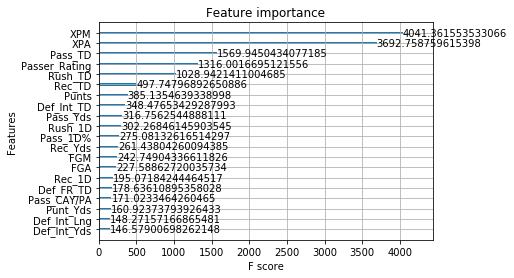

In [63]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
print(RMSE)
plot_importance(model,importance_type = 'gain',max_num_features = 20)

# Ground Up Approach

In [250]:
df_temp.columns.values

array(['Score', 'Prev_Score', 'Prev_W/L', 'Rush_Yd_Diff', 'Pass_Yd_Diff',
       'Total_Yd_Diff', 'Total_Yds', 'Net_Total_Yds', 'Total_Yds_Allow',
       'Net_Total_Yds_Allow', 'Rush_Yds_Allow', 'Pass_Yds_Allow',
       'Penalty_Yds_Against', 'Penalties', 'Penalty_Yds', 'Pass_Cmp',
       'Pass_Att', 'Pass_Yds', 'Pass_TD', 'INT_Thrown', 'Sk_Taken',
       'SK_Yds', 'Pass_Long', 'Passer Rating', 'Rush_Att', 'Rush_Yds',
       'Rush_TD', 'Rush_Lng', 'Rec_Tgt', 'Receptions', 'Rec_Yds',
       'Rec_TD', 'Rec_Lng', 'Fumble_Total', 'Fumbles_Lost', 'Def_INT',
       'Def_INT_Yds', 'Def_INT_TD', 'Def_INT_Lng', 'PD', 'Def_Sk',
       'Comb_Tkl', 'Solo_Tkl', 'Ast_Tkl', 'TFL', 'QBHits', 'Def_FR',
       'Def_FR_Yds', 'Def_FR_TD', 'Force_Fum', 'K_Ret', 'K_Ret_Yds',
       'K_Ret_YPR', 'K_Ret_TD', 'K_Ret_Lng', 'P_Ret', 'P_Ret_Yds',
       'P_Ret_YPR', 'P_Ret_TD', 'P_Ret_Lng', 'XPM', 'XPA', 'FGM', 'FGA',
       'Punts', 'Punt_Yds', 'Yards_Per_Punt', 'Punt_Lng', 'P_1D',
       'P_1D_Perc', 'IAY', 'IA

In [251]:
import numpy as np
np.random.seed(27)
df_temp['Dummy'] = np.random.randint(0,2,df_temp.shape[0])

In [404]:
variables = ['Prev_Score','opp_Net_Total_Yds_Allow','Punt_Yds','P_1D_Perc','XPA'
             #,'Total_Yds'
             #,'Passer Rating','Sk_Taken.1'
            ]

X = df_temp.loc[:,variables]
y = df_temp['Score']

# XGBoost

In [405]:
n_estimators = [100, 250, 500, 750, 1000]
max_depth = [5,10,20,50,100,250]
booster = ['gbtree','gblinear']
gamma = [0.1,0.5,1,1.5,2,2.5,3]
colsample_bytree = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
colsample_bynode = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
eta = [.01,.05,.1,.2]
subsample = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
reg_alpha = [0,1,10,100]
reg_lambda = [1,10,100]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree,
               'colsample_bynode': colsample_bynode,
               'eta':eta,
               'subsample':subsample,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_alpha
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = xgboost.XGBRFRegressor(random_state = 27)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(model, param_distributions = random_grid, 
                               n_iter = 100, cv = cv, scoring = 'neg_mean_squared_error', verbose=2, 
                               random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished
C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=27, test_size=0.2, train_size=None),
                   error_score='raise-deprecating',
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=0.8,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=1,
                                            max_delta_ste...
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                                        'max_depth': [5, 10, 20, 50, 100, 250],
                                        'n_estimators'

In [406]:
rf_random.best_params_

{'subsample': 0.7,
 'reg_lambda': 0,
 'reg_alpha': 1,
 'n_estimators': 750,
 'max_depth': 10,
 'gamma': 2,
 'eta': 0.01,
 'colsample_bytree': 1,
 'colsample_bynode': 0.2,
 'booster': 'gbtree'}

In [407]:
subsample = rf_random.best_params_['subsample']
n_estimators = rf_random.best_params_['n_estimators']
max_depth = rf_random.best_params_['max_depth']
gamma = rf_random.best_params_['gamma']
eta = rf_random.best_params_['eta']
colsample_bytree = rf_random.best_params_['colsample_bytree']
colsample_bynode = rf_random.best_params_['colsample_bynode']
booster = rf_random.best_params_['booster']
reg_alpha = rf_random.best_params_['reg_alpha']
reg_lambda = rf_random.best_params_['reg_lambda']

In [408]:
model = xgboost.XGBRFRegressor(random_state = 27, subsample = subsample, n_estimators = n_estimators, max_depth = max_depth,
                               gamma = gamma, eta = eta, colsample_bytree = colsample_bytree, 
                               colsample_bynode = colsample_bynode,booster = booster, reg_alpha = reg_alpha,
                               reg_lambda = reg_lambda,
                               n_jobs = -1,verbose = 2)

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state = 27)

In [410]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
RMSE

[20:08:27] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




9.984018844773205

In [411]:
df = pd.DataFrame()
df['preds'] = preds
df['actual'] = y_test.values
df

,preds,actual
0,26.788597,33
1,24.482334,10
2,22.389975,38
3,23.390852,20
4,25.384216,45
5,24.634563,30
6,22.829849,27
7,24.813440,10
8,26.666988,27
9,22.400955,12


In [412]:
from scipy import stats
stats.describe(preds)

DescribeResult(nobs=288, minmax=(16.717897, 34.240425), mean=23.754475, variance=6.781445, skewness=-0.18421149253845215, kurtosis=0.8029181996800143)

In [290]:
df_corr = df_temp.corr()
Score_corr = df_corr['Score']
Score_corr = abs(Score_corr)
sorted_scores = Score_corr.sort_values(ascending = False)
sorted_scores

Score                      1.000000
Prev_Score                 0.166836
opp_Net_Total_Yds_Allow    0.140330
Punt_Yds                   0.129875
P_1D_Perc                  0.129599
opp_Total_Yds_Allow        0.128788
XPA                        0.128110
Punts                      0.125222
Prev_W/L                   0.124125
Total_Yds                  0.122993
XPM                        0.121269
Passer Rating              0.119178
Total_Yd_Diff              0.118498
Net_Total_Yds              0.118418
Rush_YBC                   0.104150
Rush_Yds                   0.098379
Sk_Taken.1                 0.096413
opp_Pass_Yds_Allow         0.095587
Rush_Yd_Diff               0.094647
SK_Yds                     0.094587
Pass_TD                    0.093935
Rec_1D                     0.093542
Rush_1D                    0.092842
CAY_Per_Att                0.092369
P_1D                       0.091334
Rush_YBC_Per_Att           0.090629
Penalty_Yds_Against        0.084940
opp_Comb_Tkl               0

# 2 Week Average

In [473]:
#Read in Data
Two_Week_Avg = pd.read_csv('2_Week_Avg.csv')
df_corr = Two_Week_Avg.corr()
Score_corr = df_corr['Score']
Score_corr = abs(Score_corr)
sorted_scores = Score_corr.sort_values(ascending = False)
sorted_scores

Score                          1.000000
Avg_Score                      0.198026
Avg_Punt_Yds                   0.189537
Avg_Punts                      0.187370
Avg_P_1D_Perc                  0.168188
Avg_Passer Rating              0.167503
Avg_Net_Total_Yds              0.164316
Avg_XPA                        0.162477
Avg_Total_Yds                  0.160107
Avg_XPM                        0.156694
Avg_Sk_Taken.1                 0.136443
Avg_Pass_TD                    0.132802
opp_Avg_Net_Total_Yds_Allow    0.130969
Avg_Rec_1D                     0.129752
Avg_SK_Yds                     0.125713
opp_Avg_Total_Yds_Allow        0.125654
Avg_P_1D                       0.121666
Avg_CAY_Per_Att                0.118767
Avg_Rec_TD                     0.118659
Avg_QB_Pressured_Perc          0.113903
Avg_Rec_YBC                    0.112707
Avg_Rush_1D                    0.110691
Avg_Rec_Yds                    0.108475
Avg_Pass_Yds                   0.108349
Avg_CAY                        0.102604


In [474]:
df_temp = Two_Week_Avg
variables = ['Avg_Score','Avg_Punt_Yds','Avg_Punts']

y = df_temp['Score']
#X = df_temp.loc[:,variables]
X = df_temp.drop(columns = {'Seas', 'Week', 'Team', 'Opponent', 'Unique_ID', 'Opponent_ID',
       'Home/Away', 'Score', 'Opp_Score'})

In [475]:
n_estimators = [100, 250, 500, 750, 1000]
max_depth = [5,10,20,50,100,250]
booster = ['gbtree','gblinear']
gamma = [0.1,0.5,1,1.5,2,2.5,3]
colsample_bytree = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
colsample_bynode = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
eta = [.01,.05,.1,.2]
subsample = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
reg_alpha = [0,1,10,100]
reg_lambda = [1,10,100]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree,
               'colsample_bynode': colsample_bynode,
               'eta':eta,
               'subsample':subsample,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_alpha
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = xgboost.XGBRFRegressor(random_state = 27)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(model, param_distributions = random_grid, 
                               n_iter = 100, cv = cv, scoring = 'neg_mean_squared_error', verbose=2, 
                               random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.4min finished
C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=27, test_size=0.2, train_size=None),
                   error_score='raise-deprecating',
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=0.8,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=1,
                                            max_delta_ste...
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                                        'max_depth': [5, 10, 20, 50, 100, 250],
                                        'n_estimators'

In [476]:
rf_random.best_params_

{'subsample': 0.6,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 500,
 'max_depth': 20,
 'gamma': 0.5,
 'eta': 0.05,
 'colsample_bytree': 0.2,
 'colsample_bynode': 0.5,
 'booster': 'gbtree'}

In [477]:
subsample = rf_random.best_params_['subsample']
n_estimators = rf_random.best_params_['n_estimators']
max_depth = rf_random.best_params_['max_depth']
gamma = rf_random.best_params_['gamma']
eta = rf_random.best_params_['eta']
colsample_bytree = rf_random.best_params_['colsample_bytree']
colsample_bynode = rf_random.best_params_['colsample_bynode']
booster = rf_random.best_params_['booster']
reg_alpha = rf_random.best_params_['reg_alpha']
reg_lambda = rf_random.best_params_['reg_lambda']

In [478]:
model = xgboost.XGBRFRegressor(random_state = 27, subsample = subsample, n_estimators = n_estimators, max_depth = max_depth,
                               gamma = gamma, eta = eta, colsample_bytree = colsample_bytree, 
                               colsample_bynode = colsample_bynode,booster = booster, reg_alpha = reg_alpha,
                               reg_lambda = reg_lambda,
                               n_jobs = -1,verbose = 2)

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state = 27)

In [480]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
RMSE

[23:05:53] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




9.85809703477221

In [481]:
df = pd.DataFrame()
df['preds'] = preds
df['actual'] = y_test.values
df

,preds,actual
0,25.104820,30.0
1,26.049559,10.0
2,26.043777,11.0
3,21.642174,20.0
4,21.551634,18.0
5,25.146383,19.0
6,24.221991,30.0
7,22.358105,24.0
8,20.570091,25.0
9,21.153957,28.0


In [482]:
from scipy import stats
stats.describe(preds)

DescribeResult(nobs=269, minmax=(16.522947, 28.94116), mean=23.45583, variance=4.5654387, skewness=-0.25819772481918335, kurtosis=-0.06540960753481428)

# Three Week Avg

In [459]:
#Read in Data
Three_Week_Avg = pd.read_csv('3_Week_Avg.csv')
df_corr = Three_Week_Avg.corr()
Score_corr = df_corr['Score']
Score_corr = abs(Score_corr)
sorted_scores = Score_corr.sort_values(ascending = False)
sorted_scores

Score                          1.000000
Avg_Score                      0.212491
Avg_Punt_Yds                   0.205085
Avg_Punts                      0.204822
Avg_XPA                        0.177405
Avg_P_1D_Perc                  0.175770
Avg_Passer Rating              0.175579
Avg_XPM                        0.162079
Avg_Total_Yds                  0.160472
Avg_Net_Total_Yds              0.160208
Avg_Pass_TD                    0.156241
Avg_Rec_TD                     0.139927
Avg_SK_Yds                     0.138670
Avg_Rec_1D                     0.137018
Avg_Sk_Taken.1                 0.132255
Avg_CAY_Per_Att                0.130133
Avg_P_1D                       0.127446
Avg_Rec_YBC                    0.115724
Avg_Rush_1D                    0.114324
opp_Avg_Total_Yds_Allow        0.110044
opp_Avg_Comb_Tkl               0.107263
opp_Avg_Net_Total_Yds_Allow    0.106334
Avg_CAY                        0.105756
Avg_Rec_Yds                    0.105252
Avg_Pass_Yds                   0.105039


In [461]:
df_temp = Three_Week_Avg
variables = ['Avg_Score','Avg_Punt_Yds','Avg_Punts']

y = df_temp['Score']
#X = df_temp.loc[:,variables]
X = df_temp.drop(columns = {'Seas', 'Week', 'Team', 'Opponent', 'Unique_ID', 'Opponent_ID',
       'Home/Away', 'Score', 'Opp_Score', 'Unnamed: 227', 'Unnamed: 228',
       'Unnamed: 229','Unnamed: 230','Unnamed: 231'})

In [462]:
n_estimators = [100, 250, 500, 750, 1000]
max_depth = [5,10,20,50,100,250]
booster = ['gbtree','gblinear']
gamma = [0.1,0.5,1,1.5,2,2.5,3]
colsample_bytree = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
colsample_bynode = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
eta = [.01,.05,.1,.2]
subsample = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
reg_alpha = [0,1,10,100]
reg_lambda = [1,10,100]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree,
               'colsample_bynode': colsample_bynode,
               'eta':eta,
               'subsample':subsample,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_alpha
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = xgboost.XGBRFRegressor(random_state = 27)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(model, param_distributions = random_grid, 
                               n_iter = 100, cv = cv, scoring = 'neg_mean_squared_error', verbose=2, 
                               random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.3min finished
C:\Users\Steve Mann\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=27, test_size=0.2, train_size=None),
                   error_score='raise-deprecating',
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=0.8,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=1,
                                            max_delta_ste...
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                                        'max_depth': [5, 10, 20, 50, 100, 250],
                                        'n_estimators'

In [463]:
rf_random.best_params_

{'subsample': 0.7,
 'reg_lambda': 0,
 'reg_alpha': 1,
 'n_estimators': 750,
 'max_depth': 10,
 'gamma': 2,
 'eta': 0.01,
 'colsample_bytree': 1,
 'colsample_bynode': 0.2,
 'booster': 'gbtree'}

In [464]:
subsample = rf_random.best_params_['subsample']
n_estimators = rf_random.best_params_['n_estimators']
max_depth = rf_random.best_params_['max_depth']
gamma = rf_random.best_params_['gamma']
eta = rf_random.best_params_['eta']
colsample_bytree = rf_random.best_params_['colsample_bytree']
colsample_bynode = rf_random.best_params_['colsample_bynode']
booster = rf_random.best_params_['booster']
reg_alpha = rf_random.best_params_['reg_alpha']
reg_lambda = rf_random.best_params_['reg_lambda']

In [465]:
model = xgboost.XGBRFRegressor(random_state = 27, subsample = subsample, n_estimators = n_estimators, max_depth = max_depth,
                               gamma = gamma, eta = eta, colsample_bytree = colsample_bytree, 
                               colsample_bynode = colsample_bynode,booster = booster, reg_alpha = reg_alpha,
                               reg_lambda = reg_lambda,
                               n_jobs = -1,verbose = 2)

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state = 27)

In [467]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test,preds)
RMSE = math.sqrt(MSE)
RMSE

[22:50:41] WARNING: ..\src\learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




9.216351835975406

In [468]:
df = pd.DataFrame()
df['preds'] = preds
df['actual'] = y_test.values
df

,preds,actual
0,25.268152,36.0
1,24.084055,27.0
2,19.727402,30.0
3,28.070433,27.0
4,21.031961,26.0
5,25.340137,34.0
6,24.856848,24.0
7,22.648739,10.0
8,25.242104,27.0
9,22.497311,23.0


In [469]:
from scipy import stats
stats.describe(preds)

DescribeResult(nobs=250, minmax=(16.953907, 30.472975), mean=23.414875, variance=6.9219375, skewness=0.0976148471236229, kurtosis=-0.28590449301394916)